# Section 23: Calculus, Cost Functions, & Gradient Descent

- online-ds-ft-070620
- 09/15/20

## Learning Objectives

- Learn about derivatives and their rules.
- Intro to Derivatives Lab (Question)
- Discuss cost functions and how they work/are used (examples from Linear Regression).

- Discuss Cost Functions in Relation to Linear Regression
    - Walk through the process of estimating regression model and updating parameters 
    
- Applying Gradient Descent Lab?


## Questions / Comments / Insights?

- 

# Intro to Derivatives: Rates of Change

## Rate of change for a (linear) function

Slope is rate the change for line --> rate is constant

For any two points:

$$ m = \dfrac{\text{rise}}{\text{run}} = \dfrac{\Delta y}{\Delta x} = \dfrac{y_2 - y_1}{x_2 - x_1}$$


<img src="https://raw.githubusercontent.com/learn-co-students/dsc-derivatives-of-non-linear-functions-online-ds-pt-100719/master/images/sprint.gif">

In [1]:
!pip install -U fsds
from fsds.imports import *
dp.clear_output()

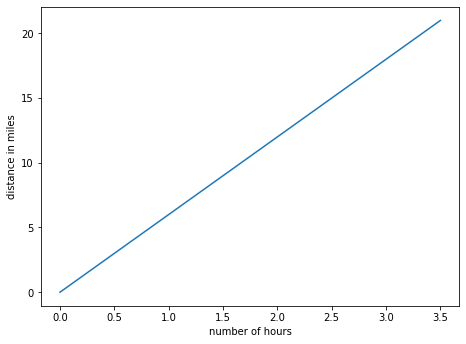

In [2]:
## Code from:
## https://learn.co/tracks/module-3-data-science-career-2-1/machine-learning/section-23-calculus/derivatives-of-non-linear-functions

def jog(miles):
    return 6*miles

fig, ax = plt.subplots(figsize=(7.5,5.5))
x = np.linspace(0, 3.5, 100)
plt.plot(x, jog(x), label = "distance given # hours")
plt.ylabel("distance in miles")
plt.xlabel("number of hours")
plt.show()

> "In this specific example, we'll imagine doing the following to calculate the speed at hour 1.
    > * Start a stopwatch after one hour and note the distance at that hour
    > * Then, let one hour elapse and mark down the distance at that next hour.  
    > * Finally, divide the difference in the distances by the elapsed time."

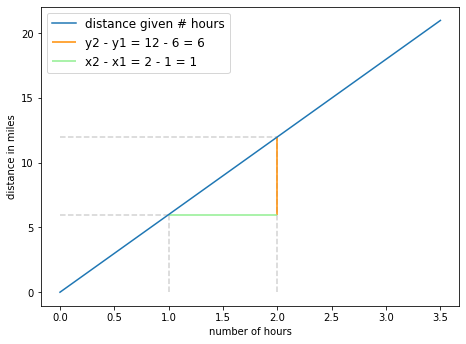

In [4]:
## Code from lesson:
## https://learn.co/tracks/module-3-data-science-career-2-1/machine-learning/section-23-calculus/derivatives-of-non-linear-functions

## Plot change x,y as lines for x=1 to x=2
x1 = 1 
y1 = jog(x1)

x2 = 2
y2 = jog(x2)

fig, ax = plt.subplots(figsize=(7.5,5.5))

x = np.linspace(0, 3.5, 100)

plt.plot(x, jog(x), label = "distance given # hours")


plt.ylabel("distance in miles")
plt.xlabel("number of hours")

ax.hlines(y=6, xmin=0, xmax=1, linestyle = "dashed", color= 'lightgrey')
ax.vlines(x=1, ymin=0, ymax=6, linestyle = "dashed", color= 'lightgrey')

ax.hlines(y=12, xmin=0, xmax=2, linestyle = "dashed", color= 'lightgrey')
ax.vlines(x=2, ymin=0, ymax=12, linestyle = "dashed", color= 'lightgrey')

ax.vlines(x=2, ymin=6, ymax=12, color="darkorange", label = "y2 - y1 = 12 - 6 = 6")
ax.hlines(y=6, xmin=1, xmax=2, color="lightgreen", label = "x2 - x1 = 2 - 1 = 1")
ax.legend(loc='upper left', fontsize='large')
fig;

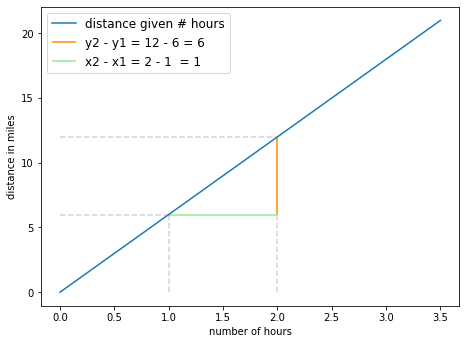

In [5]:
fig, ax = plt.subplots(figsize=(7.5,5.5))
ax.plot(x, jog(x), label = "distance given # hours")
ax.set_ylabel("distance in miles")
ax.set_xlabel("number of hours")


line_kws = dict(linestyle = "dashed", color= 'lightgrey')

ax.hlines(y=y1, xmin=0, xmax=x1, **line_kws)
ax.vlines(x=x1, ymin=0, ymax=y1, **line_kws)

ax.hlines(y=y2, xmin=0, xmax=x2, **line_kws)
ax.vlines(x=x2, ymin=0, ymax=y1, **line_kws)

ax.vlines(x=x2, ymin=y1, ymax=y2, color="darkorange", 
          label = f"y2 - y1 = {y2} - {y1} = {y2-y1}")

ax.hlines(y=y1, xmin=x1, xmax=x2, color="lightgreen", 
          label = f"x2 - x1 = {x2} - {x1}  = {x2-x1}")
ax.legend(loc='upper left', fontsize='large')

We can define this as a derivative:

$$
f'(x) = \dfrac{\Delta y}{\Delta x} =  \dfrac{f(x + \Delta x) - f(x)}{\Delta x}
$$



* $f'(x)$ is the rate of change at a given value, or here the speed at a given time


* $f(x)$ is the distance at a given time


* $\Delta x$ is the elapsed time, or the change in $x$


* $f(x + \Delta x)$ is the distance at the starting time plus the elapsed time 


<!---## Cost Functions
- Defintion:
    - A value representing model error that you want to minimize.
    
- Examples You've Seen/Used
     - MSE
     - RMSE
     - MAE
     
### Vs a Model "Score"
- A value we want to maximize for our model.
- $R^2$
    

$$ \large R^2 = 1- \dfrac{SS_{RES}}{SS_{TOT}} = 1 - \dfrac{\sum_i(y_i - \hat y_i)^2}{\sum_i(y_i - \overline y_i)^2} $$
--->

# Activity/Question: Intro to Derivatives Lab
- https://learn.co/tracks/module-3-data-science-career-2-1/machine-learning/section-23-calculus/introduction-to-derivatives-lab
- In Notes Repo > Mod 3 > sect_23


# Derivatives of Non-Linear Functions

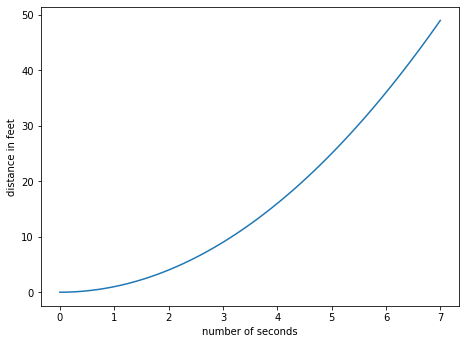

In [6]:
def f(x):
    return np.square(x)

fig, ax = plt.subplots(figsize=(7.5,5.5))

x = np.linspace(0, 7, 100)

plt.plot(x, f(x))

plt.ylabel("distance in feet")
plt.xlabel("number of seconds")
fig = plt.gcf()
ax=plt.gca()
plt.show()

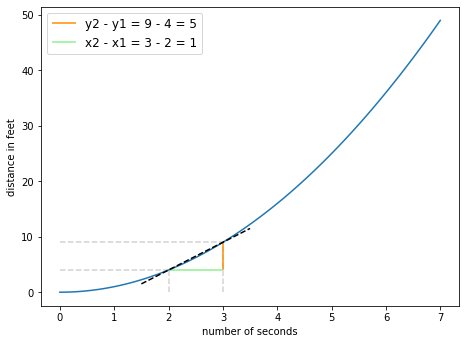

In [7]:
line_kws = dict(linestyle = "dashed", color= 'lightgrey')
ax.hlines(y=9, xmin=0, xmax=3, **line_kws)
ax.vlines(x=2, ymin=0, ymax=4, **line_kws)
ax.hlines(y=4, xmin=0, xmax=2, **line_kws)
ax.vlines(x=3, ymin=0, ymax=9, **line_kws)


ax.vlines(x=3, ymin=4, ymax=9, color="darkorange", label = "y2 - y1 = 9 - 4 = 5")
ax.hlines(y=4, xmin=2, xmax=3, color="lightgreen", label = "x2 - x1 = 3 - 2 = 1")

# tangent line
x_dev = np.linspace(1.5, 3.5, 100)
a = 2
delta_a = 1
fprime = (f(a+delta_a)-f(a))/delta_a 
tan = f(a)+fprime*(x_dev-a)

# plot of the function and the tangent
ax.plot(x_dev, tan, color = "black", linestyle="dashed")

ax.legend(loc='upper left', fontsize='large')

ax.set(ylabel="distance in feet",xlabel="number of seconds")
# plt.show()
fig

## The Problem with our prior formula 

* in our formula of $ f'(x) = \dfrac{f(x + \Delta x) - f(x)}{\Delta x} $, we are seeing the rate of change not just where $x = 2$, but from the period from $x = 2$ to $x = 3$. 

- Recall that the derivative is supposed to be the **instantaneous** rate of change! 


**A mathematician would make the same point** that we are not actually calculating the derivative: 

> Our derivative means we are calculating how fast a function is changing at any given moment, and precisely at that moment.  And unlike in where our functions were linear, here the rate of change of our function is always changing.  The larger our value of $\Delta x$, the less our derivative reflects the rate of change at just that point. 

### The solution: Decrease $\Delta{x}$ 

- [Derivatives on Non-Linear Functions](https://learn.co/tracks/data-science-career-v2/module-4-a-complete-data-science-project-using-multiple-regression/section-27-calculus-cost-function-and-gradient-descent/derivatives-of-non-linear-functions)

$$ \large f'(x) = \displaystyle {\lim_{ \Delta x \to 0}} \frac{f(x + \Delta x) - f(x)}{\Delta x} $$ 

- can also be expressed as:

$$\large f'(x) = \lim_{ h\to0} \frac{f(x + h) - f(x)}{h} $$ 

* where $h$ is used to represent $\Delta x$

Another way to see how we approach the derivative is by seeing how a line becomes more tangent to the curve as $\Delta x$ decreases.  

> Tangent to the curve means that our line is just touching the curve.

**The more that a line is tangent to the curve at a point, the more it's slope matches the derivative.**

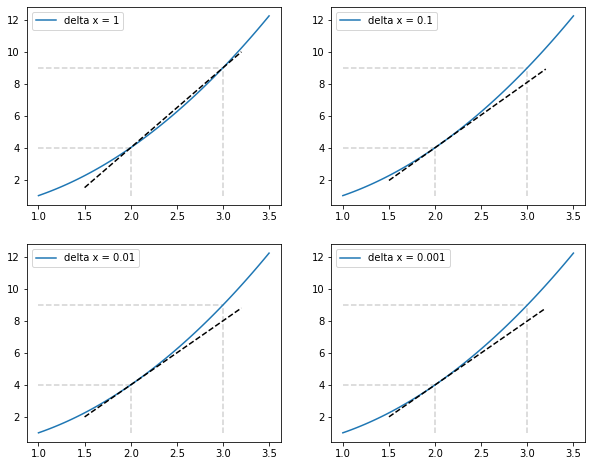

In [8]:
def make_plot(delta_a):

    lab= "delta x = " + str(delta_a)
    plt.plot(x, f(x), label = lab)

    plt.hlines(y=9, xmin=1, xmax=3, linestyle = "dashed", color= 'lightgrey')
    plt.vlines(x=2, ymin=1, ymax=4, linestyle = "dashed", color= 'lightgrey')
    plt.hlines(y=4, xmin=1, xmax=2, linestyle = "dashed", color= 'lightgrey')
    plt.vlines(x=3, ymin=1, ymax=9, linestyle = "dashed", color= 'lightgrey')

    # tangent line
    x_dev = np.linspace(1.5, 3.2, 100)
    a = 2
    fprime = (f(a+delta_a)-f(a))/delta_a 
    tan = f(a)+fprime*(x_dev-a)

    # plot of the function and the tangent
    plt.plot(x_dev, tan, color = "black", linestyle="dashed")
    plt.legend(loc="upper left", bbox_to_anchor=[0, 1],
           ncol=2, fancybox=True);
    return

x = np.linspace(1, 3.5, 100)
fig, ax = plt.subplots(figsize=(10,8))

# create 4 subplots
plt.subplot(221)
make_plot(delta_a = 1)
plt.subplot(222)
make_plot(delta_a = 0.1)
plt.subplot(223)
make_plot(delta_a = 0.01)
plt.subplot(224)
make_plot(delta_a = 0.001)

## Rules of Derivatives

### Power Rule

If f(x) is:
$$f(x) = x^r $$

Then, the derivative is: 
$$ f'(x) = r*x^{r-1} $$


- Move the exponent (r) to in front of `x` where it becomes a coefficient of x
- Replace the original exponent `r` with `r-1`

> This says that if a variable, $x$, is raised to a exponent $r$, then the derivative of that function is the exponent $r$ multiplied by the variable, with the variable raised to the original exponent minus one.  


### Constant Factor Rule

 The rule simply says if a variable is multiplied by a constant (i.e. a number), then to take the derivative of that term, apply our familiar power rule to the variable and multiply the variable by that same constant.

So given the function: 

$$f(x) = 2x^2 $$


$$f'(x) = 4x^1 = 4x $$


### Addition Terms & Coefficients


To take a derivative of a function that has multiple terms, simply take the derivative of each of the terms individually.  So for the function above, 

$$ f(x) = 4x^3 - x^2 + 3x $$

$$ f'(x) = 12x^2 - 2x + 3  $$  

$$ f(x) = 12x + 3$$  
$$ f'(x) = 12 $$

<!---### The Chain Rule

$$h'(x) = (f\circ g)'(x) = f'(g(x)) \cdot g'(x)$$

$$\frac{dh}{dx} = \frac{df}{dg} \cdot \frac{dg}{dx} = f'(y)g'(x) \text{  where } y = g(x)$$ --->

# Practicing Derivatives

## Q: Find the derivative of each function

- $ \large f(x) = 5x^6$
    - $f'(x) = ?$
    

- $\large g(x) = 30x$
    - $g'(x)=?$

- $\large z(x) = 42 $
    - $z'(x) = ? $

<!--- - $ \large  F(x) = (3x^3 +20x)^2+5 $ --->

### A:

- $ f(x) = 5x^6$
    - $\large f'(x) = 30x^5$

- $ g(x) = 30x$
    - $\large g'(x)= 30$

- $ z(x) = 42 $
- $ z(x) = 42 * (x^0) $
- $ \large z'(x) = 0*42x^{0-1} = 0 $

<!---
- $ F(x) = (3x^3 +20x)^2+5 $
    - Break it into multiple functions:
    - $ f(x) = 3x^3 +20x$
    - $ g(x) =  (f(x))^2 + 5 $ --->

# Finding Minima/Maxima with Derivatives

Let's look at the function $2x^2-8x$ and its derivative. In the code below, we create the `function_values` and `derivative_values` for $x$-es ranging from -6 to 10.

In [9]:
## Add py_files to path to import derivatives
## https://learn.co/tracks/module-3-data-science-career-2-1/machine-learning/section-23-calculus/derivatives-conclusion
from derivatives import *

import numpy as np
tuple_sq_pos  = np.array([[2, 2], [-8, 1]])

x_values = np.linspace(-6, 10, 100)
function_values = list(map(lambda x: output_at(tuple_sq_pos, x), x_values))
derivative_values = list(map(lambda x: derivative_at(tuple_sq_pos, x),x_values))

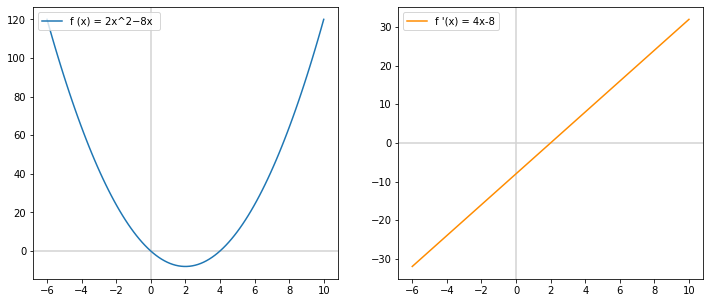

In [10]:

fig, ax = plt.subplots(figsize=(12,5))

# plot 1
plt.subplot(121)
plt.axhline(y=0, color='lightgrey', )
plt.axvline(x=0, color='lightgrey')
plt.plot(x_values, function_values, label = "f (x) = 2x^2−8x ")

plt.legend(loc="upper left", bbox_to_anchor=[0, 1], ncol=2, fancybox=True)

# plot 2
plt.subplot(122)
plt.axhline(y=0, color='lightgrey')
plt.axvline(x=0, color='lightgrey')
plt.plot(x_values, derivative_values,color="darkorange", label = "f '(x) = 4x-8")

ax.grid(True, which='both')

plt.legend(loc="upper left");

We notice that our function, $2x^2-8x$ reaches a minimum at $x = 2$. Interestingly, it is exactly at $x=2$ that our function $f'(x)$ crosses the x-axis! In mathematical terms $f'(2) = 0$!

>  This is fundamental concept behind gradient descent (which will discuss in-depth next study group), using derivatives with cost/loss functions to find the best values with the lowest error.


<img src="https://raw.githubusercontent.com/jirvingphd/dsc-gradient-descent-step-sizes-online-ds-ft-100719/master/images/snowboard.png" width=50%>

___

# APPENDIX

## STOPPING POINT FOR STUDY GROUP PART 1
- WE DID NOT COVER THE BELOW SECTION IN TODAY'S SG

In [ ]:
stop

## Linear Regression Example Analogy for Loss Functions

### Examples - Equations




$$  MSE = \frac{1}{n}\sum_{i=1}^{n}(y_{i} - \hat y_{i})^2$$

$$  RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_{i} - \hat y_{i})^2}$$



In [ ]:
from fsds_100719.imports import *

In [ ]:
## Kaggle Dataset https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data
url = "https://raw.githubusercontent.com/jirvingphd/fsds_100719_cohort_notes/master/datasets/house-prices-advanced-regression-techniques/train.csv"

df = pd.read_csv(url)
# display(df.head())
df.info()

In [ ]:
x_col='GrLivArea'
y_col='SalePrice'

fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(df[x_col], df[y_col], s=3,
          alpha=0.7, label="raw data")

ax.set(title=f"{y_col} vs {x_col}",
       ylabel=y_col,
       xlabel=x_col);

In [ ]:
def reg_plot(df,x_col='GrLivArea',y_col='SalePrice'):
    fig, ax = plt.subplots(figsize=(10,6))
    ax.scatter(df[x_col], df[y_col], s=3,
              alpha=0.7, label="raw data")

    ax.set(title=f"{y_col} vs {x_col}",
           ylabel=y_col,
           xlabel=x_col);
    return fig,ax


In [ ]:
fig=[]
fig, ax = reg_plot(df)
# y = m*x +b
slope=100
intercept=0

X = df['GrLivArea']
y_true = df['SalePrice']


formula = f"y= {slope}*x + {intercept}"
y_pred = X*slope+intercept


ax.plot(X,y_pred,label=formula,color='red',ls=':',lw=2) 
ax.legend()

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
rmse = np.sqrt(mean_squared_error(y_true,y_pred))
r2 = r2_score(y_true,y_pred) 
rmse,r2

In [ ]:
def f_x(x, slope,intercept, return_str=False):

    y_vals = slope*x+intercept
    return y_vals

def formula(slope,intercept):
    return f"y= {slope}*x + {intercept}"

def loss_function(y_true,y_pred):
    return np.sqrt(mean_squared_error(y_true,y_pred))

In [ ]:
# def regression_formula(x, slope,intercept, return_str=False):
#     if return_str:
#         return f"y= {slope}*x + {intercept}"
#     else:
#         y_vals = slope*x+intercept
#         return y_vals
    
# # def error(intercept, slope, x,y):
# #     pass

# def loss_function(y,y_hat):
#     from sklearn.metrics import mean_squared_error
#     return np.sqrt(mean_squared_error(y,y_hat))

def plot_scatter_vs_regr(df,x_col='GrLivArea',y_col='SalePrice',
                        slope=0, intercept=0):
    fig,ax = reg_plot(df,x_col=x_col,y_col=y_col)

    y_pred = f_x(x,slope,intercept)
    ax.plot(x,y_pred,
           ls=":",c='orange',lw=3,
            label=formula(slope,intercept))
    error = loss_function(y,y_pred)
    ax.set_title(f"Predictions with Error = {error}")
    ax.legend()
#     return fig,ax
    return error

In [ ]:
results = [['Slope','Intercept','Loss']]

x = df['GrLivArea']
y = df['SalePrice']


In [ ]:
my_slope=100
my_intercept=0
# regl_line = regression_formula(x,my_slope,my_intercept)
err= plot_scatter_vs_regr(df,slope=my_slope,intercept=my_intercept)
results.append([my_slope,my_intercept,err])
fs.list2df(results)

In [ ]:
my_slope+=5
my_intercept+=100
err = plot_scatter_vs_regr(df,slope=my_slope,intercept=my_intercept)
results.append([my_slope,my_intercept,err])
fs.list2df(results)

In [ ]:
my_slope+=5
my_intercept-=100
err = plot_scatter_vs_regr(df,slope=my_slope,intercept=my_intercept)
results.append([my_slope,my_intercept,err])
fs.list2df(results)

Adjust until it fits well enough

Judge by using the **cost curve**